## Purpose:
Display the behaviour at different evalution stages of training to better understand how the learner changes throughout the process. Provides information regarding:
- action choosen
- reward receive for that action
- reward for action relative to other actions at this timestep
- Trend of total reward

This this requires `best_model/evaluations.npz` that can be found in the directory of the experiment (Agent requires appropriate call back to generate this during training, See PPO for example).



In [3]:
import matplotlib.pyplot as plt
import numpy as np

def show_actions(eval_actions, eval_rew, interval, colour_interval, extra_info = False):
    '''
    eval_action np.ndarray: n * 56. each row is a complete set of actions from an evaluation round
    eval_rew np.ndarray: n * 56. each row is a complete set of rewards from an evaluation round
    Interval:  each graph will have an additional <interval> trajectories added
    colour_interval: the number of trajectories (starting from most recent) that should be included
    '''
    
    for i in range(interval, eval_actions.shape[0] + interval, interval):
        eval_action_batch = eval_actions[:i]

        num_actions = eval_action_batch.shape[0]
        eval_rew_batch = eval_rew[:i]
        # A bit of a confusing metric
        eval_rew_batch_norm = (eval_rew_batch - eval_rew_batch.min(axis = 0)) / (eval_rew_batch.max(axis = 0) - eval_rew_batch.min(axis = 0))

        colormap = plt.cm.gnuplot
        spread_colors = [colormap(i) for i in np.linspace(0, 1,colour_interval)]
        zeros = [spread_colors[0] for _ in range(max(0, num_actions - colour_interval ))]
        colors = (zeros + spread_colors)[-num_actions:]


        fig, axes = plt.subplots(nrows = 2, ncols =2,figsize = (12,12))
        for idx,traj in enumerate(eval_action_batch):
            axes[0][0].plot(np.arange(1,57,1), traj, c = colors[idx])

            axes[1][0].plot(np.arange(1,57,1), eval_rew_batch[idx], c = colors[idx])

            axes[0][1].plot([idx], [sum(eval_rew_batch[idx])], marker ='o', c = colors[idx])
            if extra_info:
                axes[1][1].scatter(np.arange(1,57,1), eval_rew_batch_norm[idx],  marker ='o', c = [colors[idx]])



In [4]:
def display_eval_behaviour(npz_path, interval, colour_interval, extra_info = False):
    data = np.load(npz_path, allow_pickle = True)
    eval_actions = data["evaluations_step_actions"]
    eval_rew = data["evaluations_step_rewards"]
    
    # sometimes the run doesn't go for the full length (bad data) - result is the dims are wrong
    if len(eval_actions.shape) == 1:
        index_to_remove = []
        for idx ,item in enumerate(eval_actions):
            if item.shape[0]!=56:
                index_to_remove.append(idx)
                print(item.shape[0], idx)
        # they there are not all of equal lengths, it doesn't make a 2d array. if you delete the bad rows and recreate it, sorts itself out
        eval_actions = np.array(np.delete(eval_actions,index_to_remove).tolist())
        eval_rew = np.array(np.delete(eval_rew,index_to_remove).tolist())
    
    eval_actions = eval_actions.reshape(-1,56)
        
    
    show_actions(eval_actions, eval_rew, interval, colour_interval, extra_info )


### example


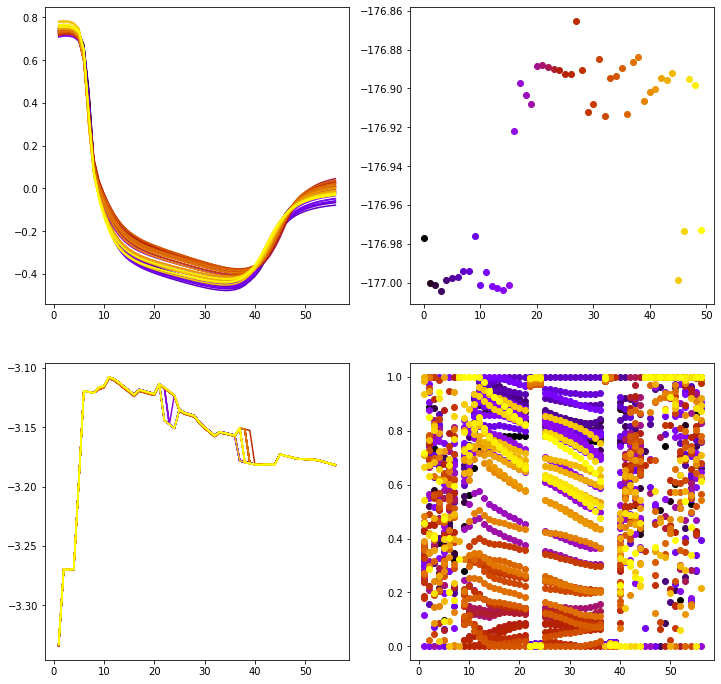

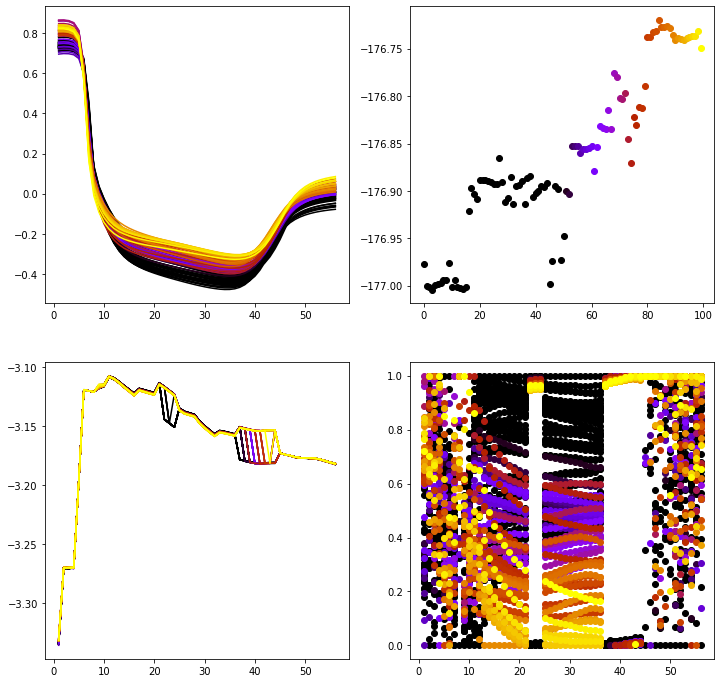

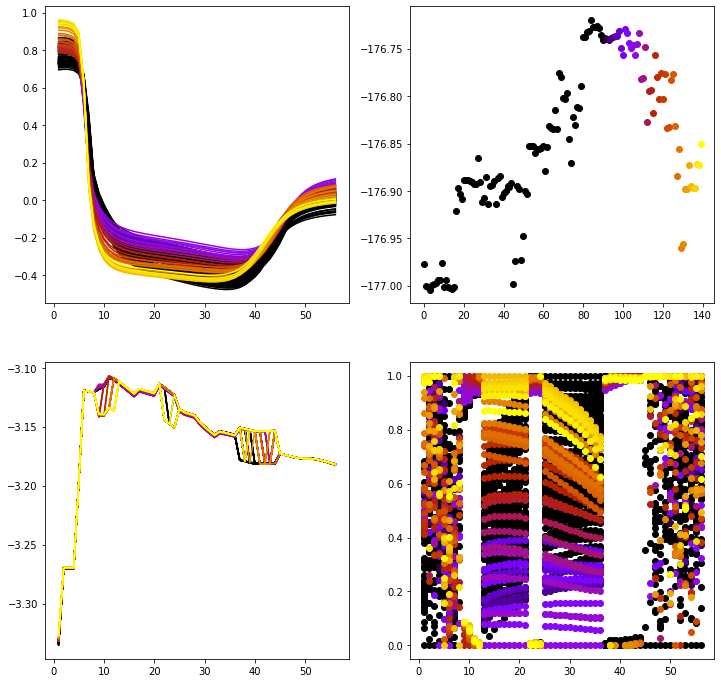

In [5]:
npz_path = "../results/examples/openai-2021-09-27-21-11-47-901559/best_model/evaluations.npz"
display_eval_behaviour(npz_path, 50, 50,  extra_info = True)